In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Data Analytics Internship/Week 6/(To Solve) Superstore Sales Dataset /train.csv")

In [6]:
df1=df

In [7]:
df1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [8]:
df1.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [9]:
df1.shape

(9800, 18)

In [10]:
df1.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [11]:
df1["Postal Code"]

0       42420.0
1       42420.0
2       90036.0
3       33311.0
4       33311.0
         ...   
9795    60610.0
9796    43615.0
9797    43615.0
9798    43615.0
9799    43615.0
Name: Postal Code, Length: 9800, dtype: float64

In [12]:
df1["Postal Code"].value_counts()

Postal Code
10035.0    253
10024.0    225
10009.0    220
94122.0    195
10011.0    193
          ... 
32935.0      1
76248.0      1
32127.0      1
32503.0      1
72762.0      1
Name: count, Length: 626, dtype: int64

In [13]:
df1["Postal Code"].mode()

0    10035.0
Name: Postal Code, dtype: float64

In [14]:
df1["Postal Code"].fillna(df1["Postal Code"].mode()[0],inplace=True)

In [15]:
df1["Postal Code"].isnull().sum()

0

In [16]:
df1["Postal Code"] = df1["Postal Code"].astype(int)

In [17]:
df1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [18]:
df1["Sales"].value_counts()

Sales
12.960     55
15.552     39
19.440     39
10.368     35
25.920     34
           ..
339.136     1
60.048      1
5.022       1
7.857       1
10.384      1
Name: count, Length: 5757, dtype: int64

In [19]:
df1["Sales"] = df1["Sales"].astype(int)


In [20]:
df1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22


In [21]:
df1.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [22]:
statistics = df1[["Sales"]].describe()
print(statistics.astype(int))

       Sales
count   9800
mean     230
std      626
min        0
25%       17
50%       54
75%      210
max    22638




- **count**: **9800**
  - There are 9800 entries in the `Sales` column, indicating that all records have a sales value.

- **mean**: **230**
  - The average sales amount is $230. This shows the central tendency of the sales data.

- **std**: **626**
  - The standard deviation is 626, indicating that sales amounts vary widely from the average. There is significant variability in the sales figures.

- **min**: **0**
  - The minimum sales amount is $0, indicating that there are transactions with no sales value.

- **25%**: **17**
  - The 25th percentile (first quartile) is $17. This means that 25% of the sales amounts are less than or equal to $17, showing the lower range of sales data.

- **50%**: **54**
  - The median (50th percentile) is $54. This value splits the data into two equal halves, with 50% of the sales values below $54 and 50% above. It represents the middle point of the distribution.

- **75%**: **210**
  - The 75th percentile (third quartile) is $210. This indicates that 75% of the sales values are less than or equal to $210, showing the upper range of sales data.

- **max**: **22,638**
  - The maximum sales amount is $22,638, representing the highest sale value in the data.



**Summary**
The Sales data shows a wide range with significant variability. The average sales amount is $230, but most sales are lower, with a median of $54. Sales range from $0 to $22,638, with a few high values skewing the average higher. The standard deviation of 626 indicates a broad spread of sales amounts. Most sales (75%) are $210 or less, highlighting that while there are some high sales, the majority are relatively low.

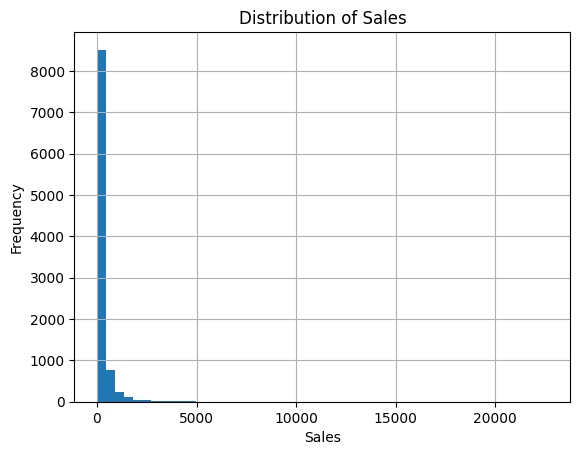

In [23]:


df1['Sales'].hist(bins=50)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()




### **Analysis of the Histogram**

1. **Distribution Shape**:
   - The histogram shows a right-skewed distribution, indicating that most sales amounts are on the lower end, with fewer high-value sales.

2. **Frequency of Low Sales**:
   - A large number of transactions have low sales values, clustered on the left side of the histogram.

3. **Presence of Outliers**:
   - The right tail extends far out, showing that there are some high sales values which are less frequent but significantly higher than the bulk of the data.

4. **KDE (Kernel Density Estimate)**:
   - The KDE line (the smooth curve) provides an estimate of the probability density function of the sales data, further emphasizing the right-skewed nature of the distribution.

5. **Central Tendency**:
   - Most sales values fall below $500, with a significant concentration below $100. This is consistent with the earlier calculated median of $54.

### **Summary**

The histogram of the `Sales` column indicates that:
- The majority of sales are small, clustering towards the lower values.
- There are a few large sales that significantly raise the mean.
- The data is skewed to the right, showing that high-value sales are rare but present.
- The KDE curve helps visualize the overall shape and density of the distribution, confirming the presence of a few high-value outliers.

By using a histogram, you can visually inspect the distribution and identify patterns, trends, and anomalies within the sales data.

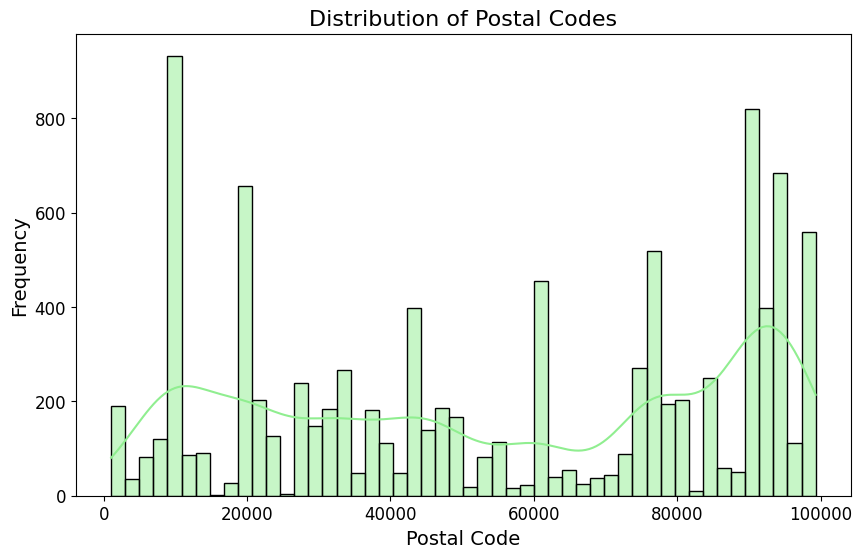

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Postal Code'], bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Postal Codes', fontsize=16)
plt.xlabel('Postal Code', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Postal Code
Histogram Interpretation:

**Distribution Shape:**
The histogram shows the distribution of orders across different postal codes. This histogram with a lot of peaks indicates that orders are widely dispersed across many regions.

**Clusters:**

High peaks in the histogram suggest areas with a higher concentration of orders. These regions might represent key markets or areas with high customer density.


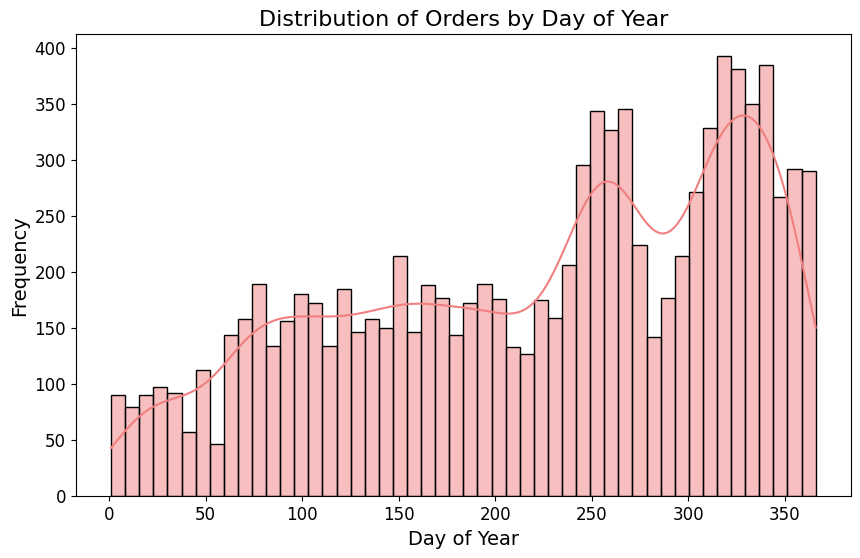

In [25]:
# Convert Order Date to datetime with dayfirst=True
df1['Order Date'] = pd.to_datetime(df1['Order Date'], dayfirst=True)

# Extract the day of the year to visualize trends
df1['Order Day'] = df1['Order Date'].dt.dayofyear

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df1['Order Day'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Orders by Day of Year', fontsize=16)
plt.xlabel('Day of Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Order Date**
Histogram Interpretation:

**Seasonal Trends:**

Peaks and troughs in the histogram can indicate periods of high and low order volumes, respectively. This could be tied to seasons, holidays, or specific marketing campaigns.
Patterns Over Time:

By examining the distribution of orders over the days of the year, we can identify any consistent patterns in order behavior. For instance, there might be an increase in orders during certain months.

**Outliers:**

Significant spikes or drops on specific dates might indicate extraordinary events or anomalies that impacted order volumes.
Key Insights:



1. Convert Date Columns to Datetime

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


df1['Order Date'] = pd.to_datetime(df1['Order Date'], dayfirst=True)


2. Aggregate Sales by Month
To observe monthly sales trends, you can resample the data to a monthly frequency and sum up the sales:

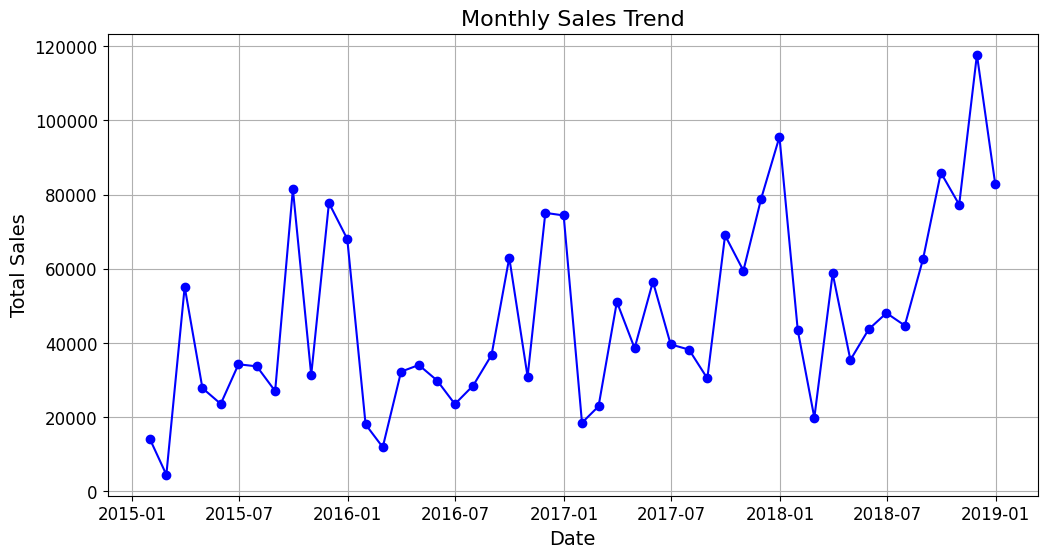

In [27]:
# Set the Order Date as the index
df1.set_index('Order Date', inplace=True)

# Resample to monthly frequency and sum sales
monthly_sales = df1['Sales'].resample('M').sum()

# Plot the time series graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


**Analysis of Time Series Plots**

**Monthly Sales Trend:**

**1.Sales Fluctuations:** The graph exhibits significant fluctuations in sales over time. Peaks and troughs indicate variability in monthly sales figures.


**2.Sales Peaks and Troughs:**
The highest point occurs around mid-2017, with sales reaching approximately 120,000.
The lowest point is around early 2018, with sales dropping to around 20,000.


**3.Trend Direction:**
Overall, there seems to be an upward trend in sales from 2015 to mid-2017.
However, after mid-2017, sales decline sharply.


**4.Business Insights:**
Analyzing these trends can help make strategic decisions. For instance, understanding why sales declined after mid-2017 could inform future business strategies.


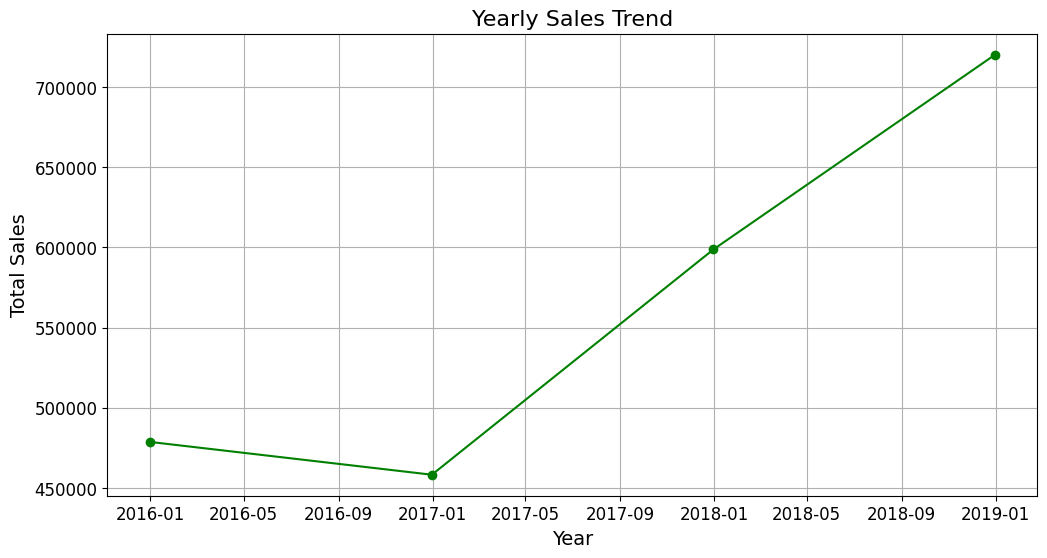

In [28]:
# Resample to yearly frequency and sum sales
yearly_sales = df1['Sales'].resample('Y').sum()

# Plot the time series graph
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales, marker='o', linestyle='-', color='g')
plt.title('Yearly Sales Trend', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


**Yearly Sales Trend**:

**1.Sales Growth:** The total sales show an upward trend over the years. Starting around 500,000, they gradually increase to approximately 700,000 by the end of 2018.


**2.Seasonal Patterns:** There seem to be seasonal fluctuations. Sales peak around mid-year (May and September) and dip slightly in January.


**3.Yearly Comparison:**

- In 2016, sales started at around 550,000 and increased steadily.

- By mid-2017, sales crossed 600,000.
In 2018, sales reached their highest point, close to 700,000.

**3.Forecasting:** Based on this trend, we can anticipate continued growth in sales for the next year.

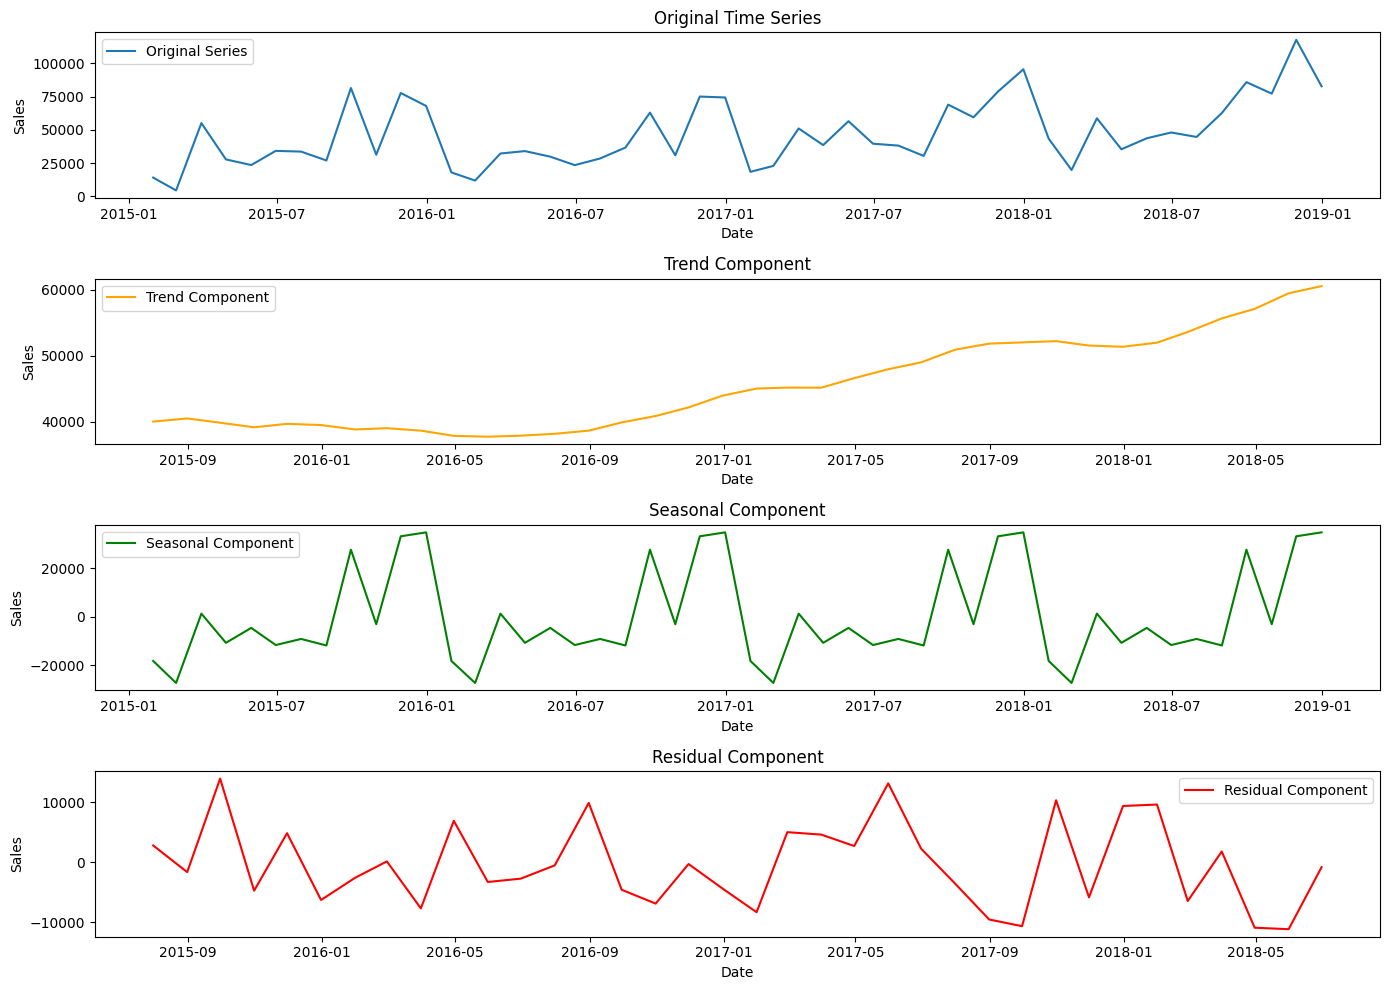

In [29]:
# Apply seasonal decomposition
decomposition = seasonal_decompose(monthly_sales, model='additive')

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
# Plot the decomposition
plt.figure(figsize=(14, 10))

# Original Series
plt.subplot(4, 1, 1)
plt.plot(monthly_sales, label='Original Series')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')

# Trend Component
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend Component', color='orange')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')

# Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal Component', color='green')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')

# Residual Component
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual Component', color='red')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


**1.Original Series:** This represents the raw data, showing fluctuations over time. It’s the starting point for decomposition.

**2.Trend Component:** The trend captures the long-term movement in the data. It’s usually a smooth line that indicates overall growth or decline.

**3.Seasonal Component:** Seasonality refers to recurring patterns within a fixed time frame (e.g., yearly, quarterly, monthly). The seasonal component highlights these regular fluctuations.

**4.Residual Component:** Also known as the error or noise, this component represents what remains after removing the trend and seasonal effects. It includes irregular variations and unexpected events.

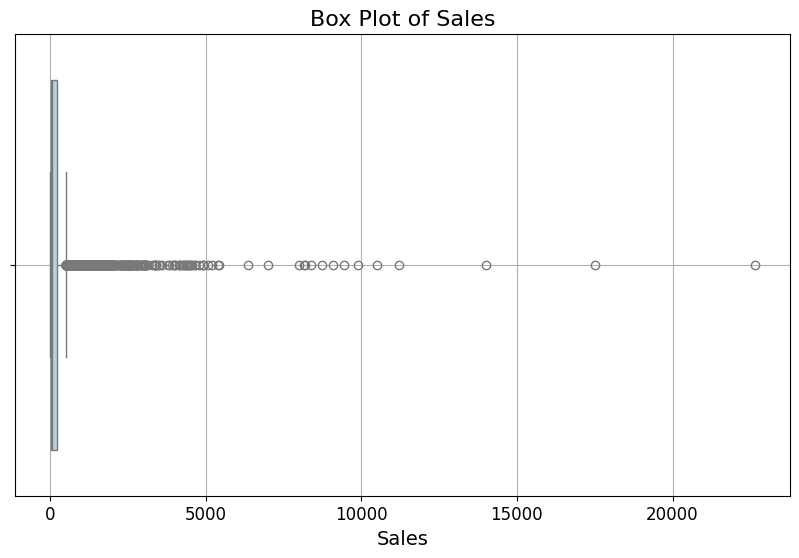

In [30]:
plt.figure(figsize=(10, 6))

# Create a box plot for Sales
sns.boxplot(x=df1['Sales'], color='lightblue')

plt.title('Box Plot of Sales', fontsize=16)
plt.xlabel('Sales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


**1.Box (Interquartile Range):** The central box represents the interquartile range (IQR), which contains 50% of the sales data. The bottom edge of the box corresponds to the first quartile (Q1), and the top edge corresponds to the third quartile (Q3).


**2.Median (Line Inside the Box):** The line inside the box represents the median sales value. It’s the point where 50% of the data lies above and 50% lies below.


**3.Whiskers:** The whiskers extend from the edges of the box. They indicate the range of data outside the first and third quartiles. Any data points beyond the whiskers are considered outliers.

**4.Outliers:** Individual points outside the whiskers represent outliers—values significantly different from the rest of the data.


**5.Scale:** The y-axis likely represents sales values, ranging from 0 to over 20,000.

<ipython-input-31-b16a18be8c64>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=sales_by_category, palette='viridis')


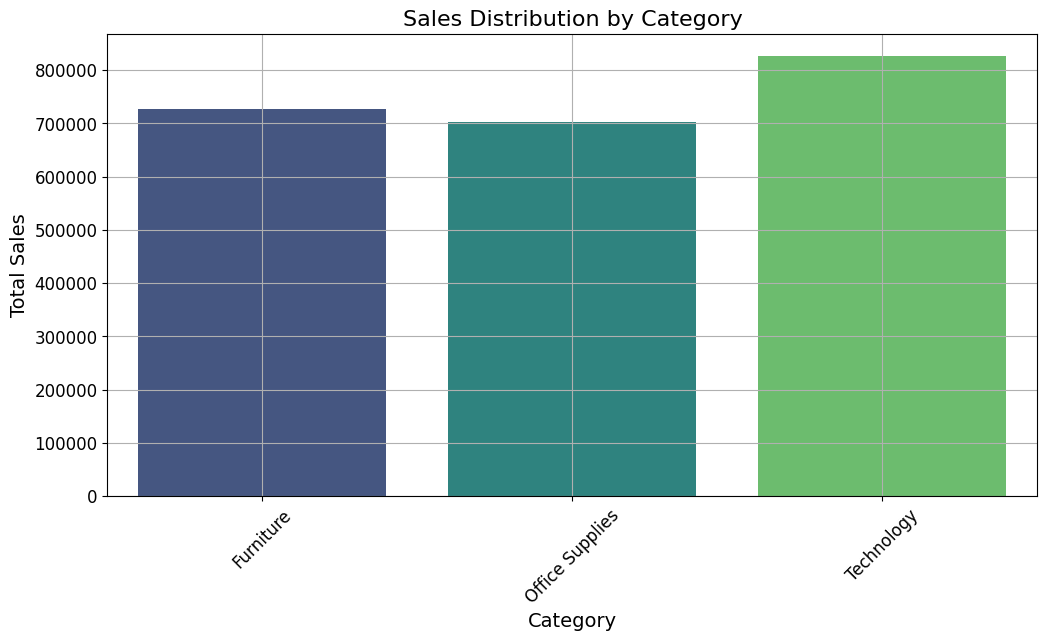

In [31]:
# Aggregate sales by category
sales_by_category = df1.groupby('Category')['Sales'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=sales_by_category, palette='viridis')
plt.title('Sales Distribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

The chart displays three categories: Furniture, Technology, and Office Supplies. Here are some key observations:

**1.Furniture Sales:** The Furniture category has the highest total sales, reaching approximately $800,000.


**2.Technology Sales:** Technology sales closely follow Furniture, with a total of around $700,000.

**3.Office Supplies Sales:** Office Supplies have the lowest sales, at approximately $400,000.

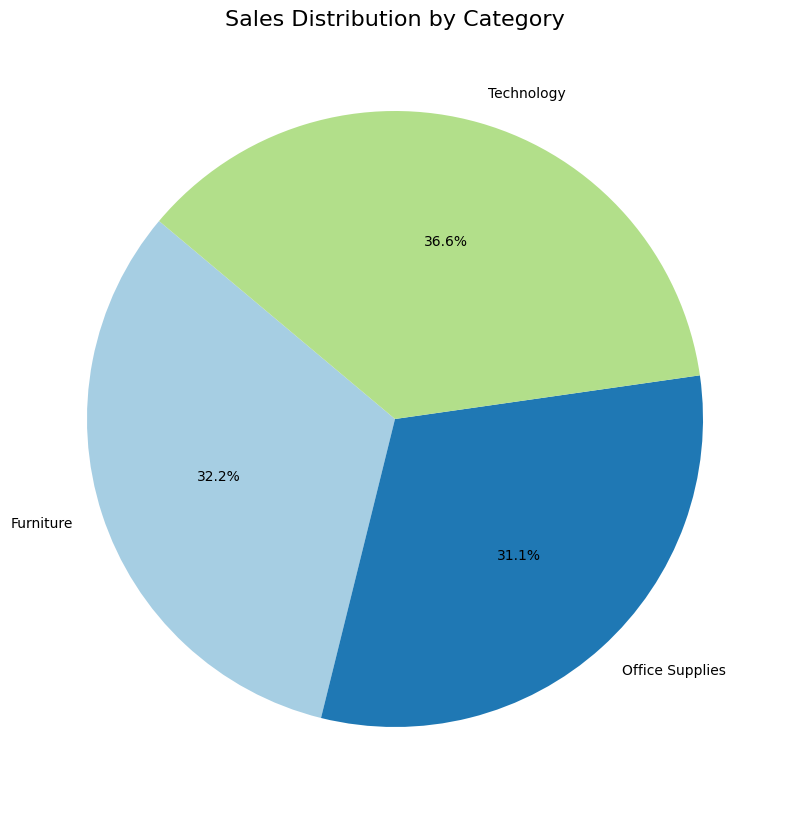

In [32]:
# Aggregate sales by category
sales_by_category = df1.groupby('Category')['Sales'].sum()

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(sales_by_category))))
plt.title('Sales Distribution by Category', fontsize=16)
plt.show()

The pie chart represents the distribution of sales across three categories:

**1.Technology:** This category accounts for the largest share, with approximately 36.6% of total sales.

**2.Office Supplies:** The blue section represents office supplies, contributing around 31.1% to the overall sales.


**3.Furniture:** The smallest segment, colored gray, corresponds to furniture sales, making up approximately 32.2% of the total.


**In summary:**

Technology dominates the sales distribution.
Office supplies follow closely.
Furniture sales are comparatively lower.

In [33]:
df1.isnull().sum()

Row ID           0
Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Order Day        0
dtype: int64

In [34]:
df1['Postal Code'] = df1['Postal Code'].astype(int)

# Drop rows with missing values in numeric columns
df1 = df1.dropna(subset=['Sales', 'Postal Code'])

# Select relevant numeric columns
numeric_columns = df1[['Sales', 'Postal Code']]

In [35]:
# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)


                Sales  Postal Code
Sales        1.000000    -0.025433
Postal Code -0.025433     1.000000


<Axes: >

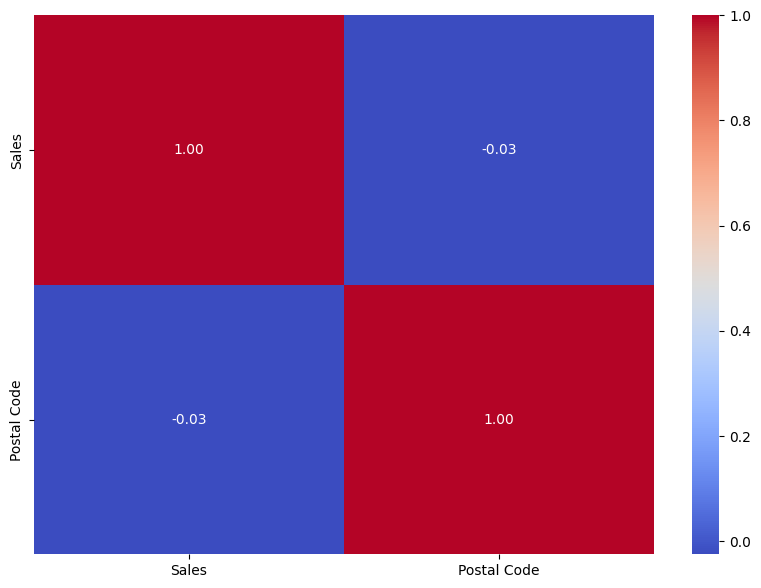

In [36]:
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

**Color Coding:**

- The heatmap consists of four squares, each corresponding to an intersection of “Sales” and “Postal Code.”
- Two squares are red, indicating a value of 1.00. These represent the correlation of “Sales” with itself and “Postal Code” with itself.
- The other two squares are blue, indicating a value of approximately -0.03. These represent the correlation between “Sales” and “Postal Code.”

**Correlation Interpretation:**

- The positive correlation (red squares) suggests that “Sales” is strongly related to itself (which is expected) and that “Postal Code” is also strongly related to itself (which might be surprising).

- The negative correlation (blue squares) indicates a weak relationship between “Sales” and “Postal Code.”

**Overall Conclusion:**

-Based on this heatmap, there seems to be little or no correlation between sales and postal codes.


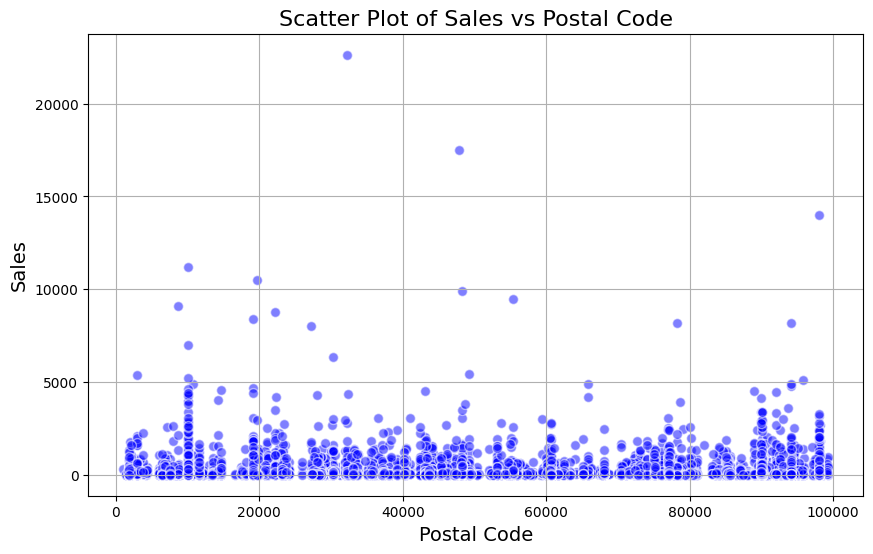

In [37]:
import matplotlib.pyplot as plt

# Scatter plot of Sales vs Postal Code
plt.figure(figsize=(10, 6))
plt.scatter(df1['Postal Code'], df1['Sales'], alpha=0.5, c='b', edgecolors='w', s=50)
plt.title('Scatter Plot of Sales vs Postal Code', fontsize=16)
plt.xlabel('Postal Code', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.grid(True)
plt.show()


**Sales Distribution:**

Most data points are clustered at the lower end of the sales axis (below 20,000).
There are a few outliers that reach higher sales values.

**Postal Codes:**

The horizontal axis represents postal codes, ranging from 0 to 100,000.
Sales seem to vary across different postal code ranges.

**Potential Insights:**

Further analysis could reveal patterns related to geographic regions, demographics, or market segments.
It might be interesting to explore why certain postal codes have higher sales than others.

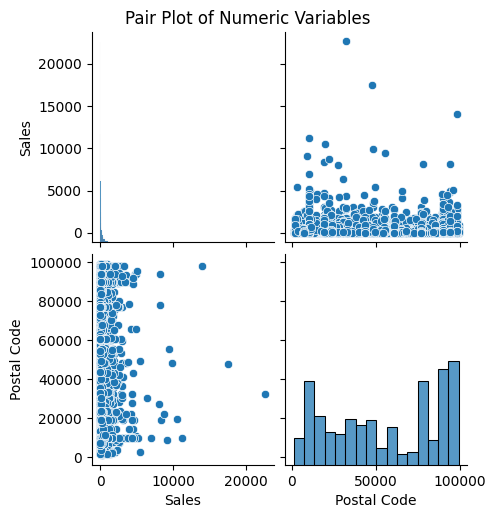

In [38]:
sns.pairplot(numeric_columns)
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

**Scatter Plots:**

- The top left plot compares ‘Sales’ on both axes. It shows a concentration of points near the origin, with some outliers extending upwards.

- The top right and bottom left plots are identical, showing the relationship between ‘Postal Code’ (on the horizontal axis) and ‘Sales’ (on the vertical axis). These scatter plots have many points clustered at lower sales values across various postal codes.

- The bottom right plot is a histogram of the ‘Postal Code’, displaying the frequency of different postal code values. Most occurrences are in the lower range of postal codes.

**Insights:**

The scatter plots suggest that there might be a correlation between sales and postal codes.
The histogram shows the distribution of postal codes, which could be useful for market analysis or demographic studies.


In [39]:
df1.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Day
Order Date,,,,,,,,,,,,,,,,,,
2017-11-08,1,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261,312
2017-11-08,2,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731,312
2017-06-12,3,CA-2017-138688,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14,163
2016-10-11,4,US-2016-108966,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957,285
2016-10-11,5,US-2016-108966,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22,285


In [40]:
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'], format='%d/%m/%Y')

# Drop rows with missing values in 'Sales', 'Category', or 'Ship Date'
df1 = df1.dropna(subset=['Sales', 'Category', 'Ship Date'])

# Extract year and month from 'Ship Date' for aggregation
df1['YearMonth'] = df1['Ship Date'].dt.to_period('M')


In [41]:
# Aggregate sales by category and time period
sales_by_category = df1.groupby(['YearMonth', 'Category'])['Sales'].sum().unstack()

# Reset index for plotting
sales_by_category = sales_by_category.reset_index()


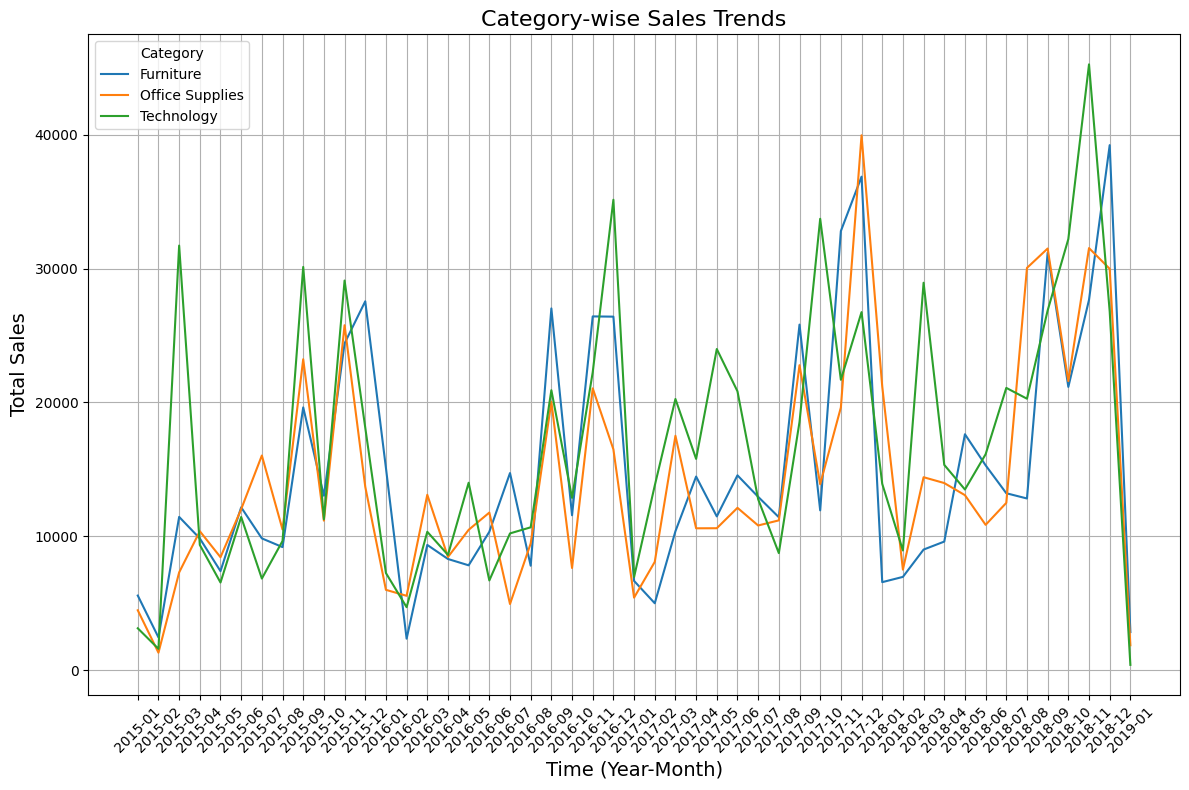

In [42]:
import matplotlib.pyplot as plt

# Plot line charts
plt.figure(figsize=(12, 8))
for category in sales_by_category.columns[1:]:
    plt.plot(sales_by_category['YearMonth'].astype(str), sales_by_category[category], label=category)

plt.title('Category-wise Sales Trends', fontsize=16)
plt.xlabel('Time (Year-Month)', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**Furniture Sales:**

- The Furniture category shows fluctuations over time.
- Sales peaked around mid-2013 and gradually declined afterward.
- There’s a noticeable dip in early 2014.

**Office Supplies Sales:**

- Office Supplies sales remained relatively stable.
- There’s a slight upward trend from 2012 to 2014.

**Technology Sales:**

- Technology sales experienced significant growth.
- The trend is consistently upward, with a sharp increase in late 2013.

**Overall Trends:**

- Total sales across all categories increased over the years.
- Furniture and Office Supplies contributed to steady growth, while Technology had the most substantial impact.

In [43]:

sales_by_region = df1.groupby(['Region', 'Category'])['Sales'].sum().unstack()
# Reset index for easier plotting
sales_by_region = sales_by_region.reset_index()


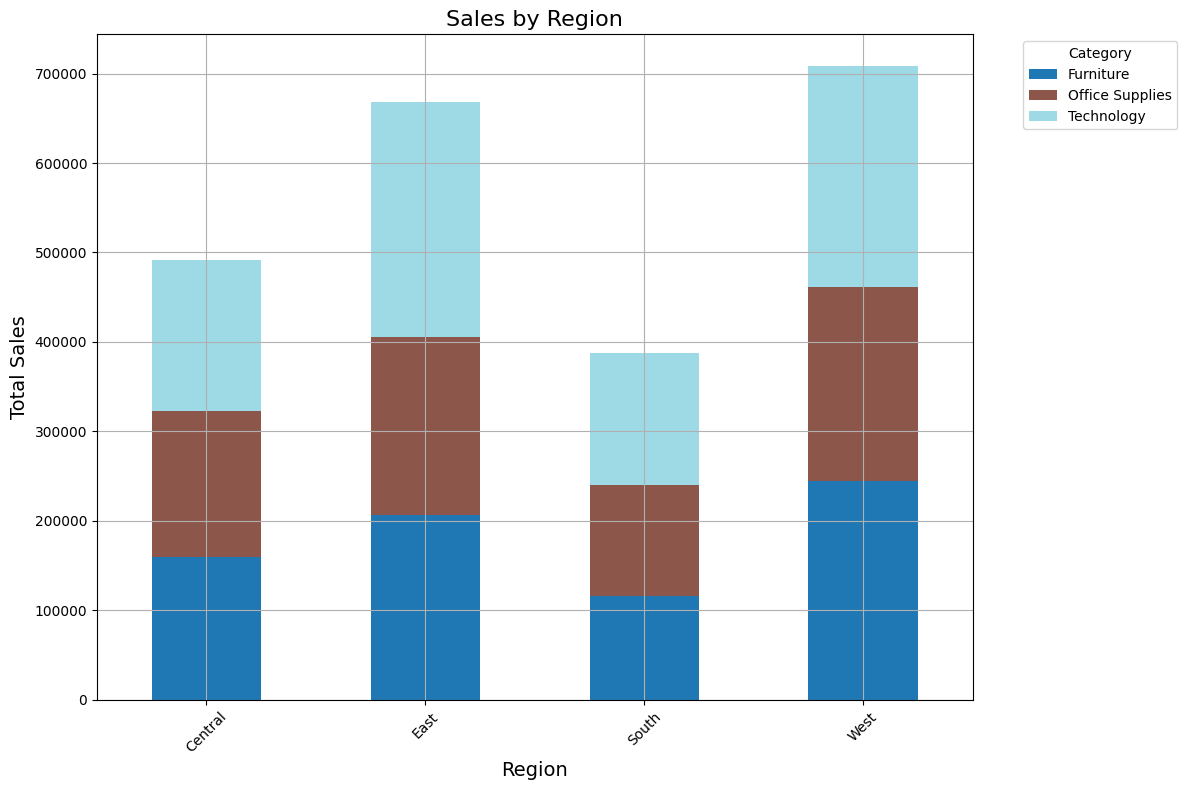

In [44]:


# Plot stacked bar chart
ax = sales_by_region.set_index('Region').plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

# Add titles and labels
plt.title('Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**Categories:**

-- The three categories represented in the chart are:
1.Furniture

2.Office Supplies

3.Technology

**Sales Distribution:**

- The vertical axis represents “Total Sales,” ranging from 0 to 700,000 (in increments of 100,000).

- Each region has a stacked bar showing the sales for each category.

- The colors blue, orange, and brown correspond to Furniture, Office Supplies, and Technology, respectively.

**Regional Performance:**

- East appears to have the highest total sales across all categories.
- Central and South follow closely, while West has the lowest sales.

In [45]:
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'])
df1['Month'] = df1['Ship Date'].dt.to_period('M')

# Group by customer segment and month to get total sales
sales_by_segment = df1.groupby(['Month', 'Segment'])['Sales'].sum().unstack()

In [46]:
# Reset index for easier plotting
sales_by_segment = sales_by_segment.reset_index()


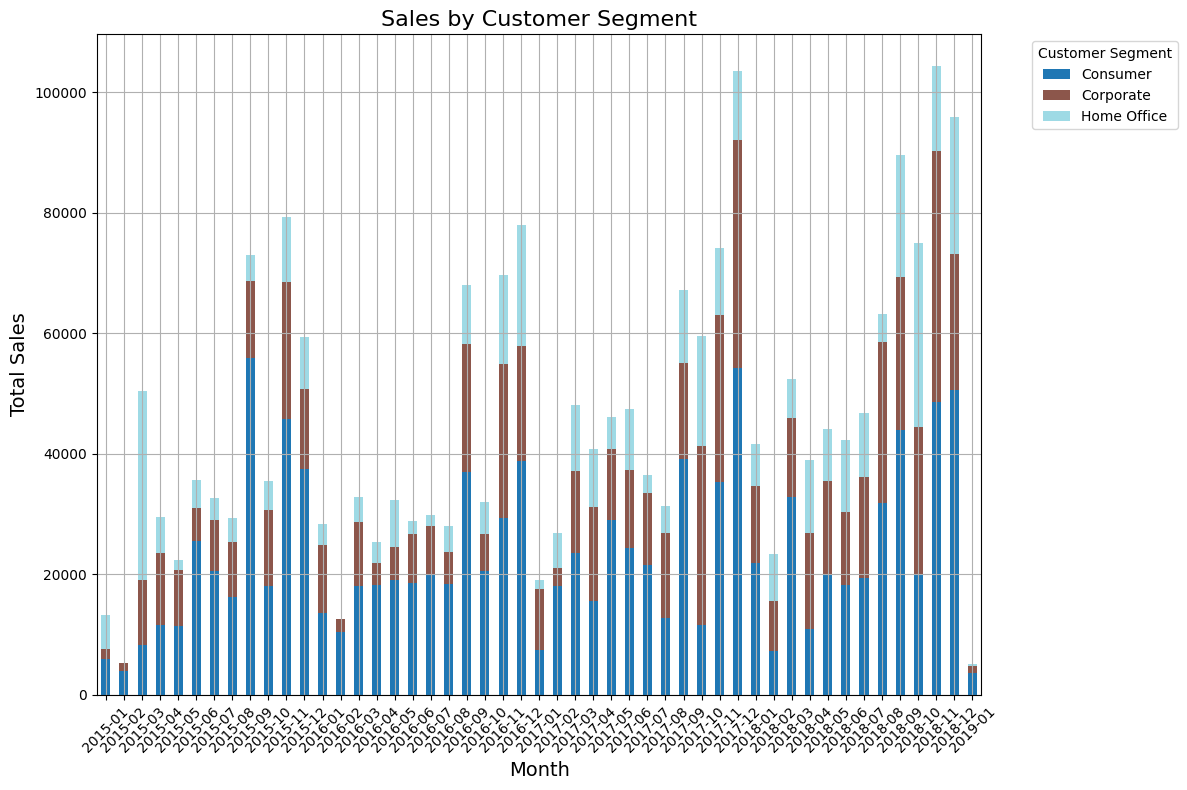

In [47]:
# Plot bar chart
sales_by_segment.set_index('Month').plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

# Add titles and labels
plt.title('Sales by Customer Segment', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**Customer Segments:**

- The three segments represented in the chart are:
1.Consumer

2.Corporate

3.Home Office

**Sales Distribution:**

-The vertical axis represents “Total Sales,” ranging from 0 to 100,000 (in increments of 10,000).

- Each month has three bars clustered together, representing the sales for each segment.
The colors blue (Consumer), orange (Corporate), and gray (Home Office) differentiate the segments.

**Time Period:**

- The horizontal axis represents months, but the specific months are not legible in the image.

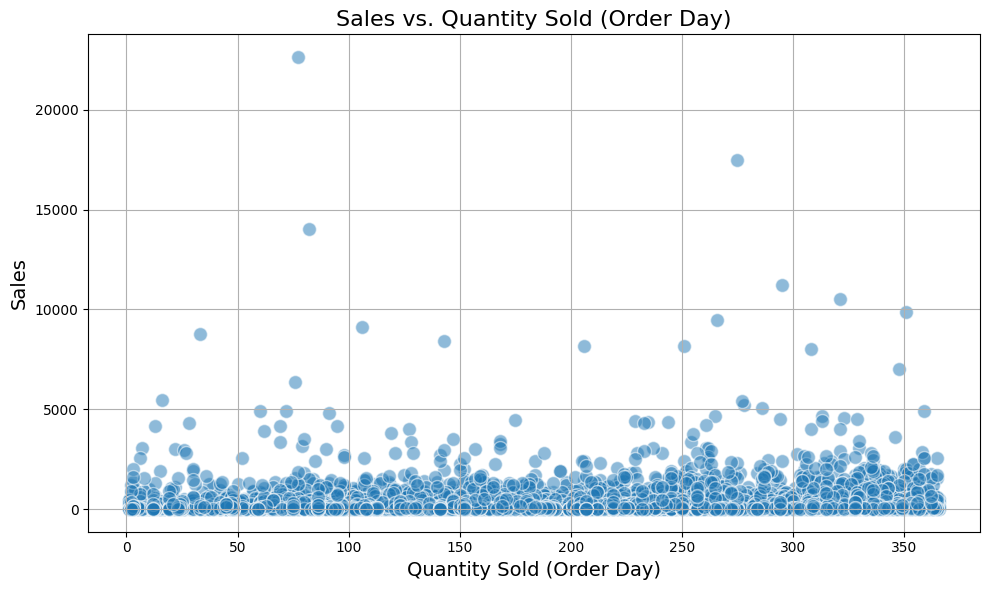

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['Order Day'], df1['Sales'], alpha=0.5, edgecolors='w', s=100)

# Add titles and labels
plt.title('Sales vs. Quantity Sold (Order Day)', fontsize=16)
plt.xlabel('Quantity Sold (Order Day)', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

**Quantity Sold (X-Axis):**

 The horizontal axis represents the quantity of items sold. It ranges from 0 to approximately 350. Most data points are clustered near the lower end of the scale, indicating a higher frequency of smaller sales quantities.


**Sales (Y-Axis):**
 The vertical axis represents the sales achieved. It ranges from 0 to approximately 25,000. Again, most data points are concentrated near the lower sales values.

**Outliers:**
 There are a few data points that deviate from the main cluster. These outliers represent orders with significantly higher sales values despite a relatively small quantity sold.


Overall Trend: The overall trend suggests that as the quantity sold increases, sales tend to rise, but not necessarily in a linear fashion. There might be other factors at play, such as pricing, discounts, or customer behavior.

In [49]:
df1.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Day,YearMonth,Month
Order Date,,,,,,,,,,,,,,,,,,,,
2017-11-08,1,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261,312,2017-11,2017-11
2017-11-08,2,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731,312,2017-11,2017-11
2017-06-12,3,CA-2017-138688,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14,163,2017-06,2017-06
2016-10-11,4,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957,285,2016-10,2016-10
2016-10-11,5,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22,285,2016-10,2016-10


In [50]:
# Aggregate quantity sold by segment
quantity_by_segment = df1.groupby('Segment')['Order Day'].sum().reset_index()

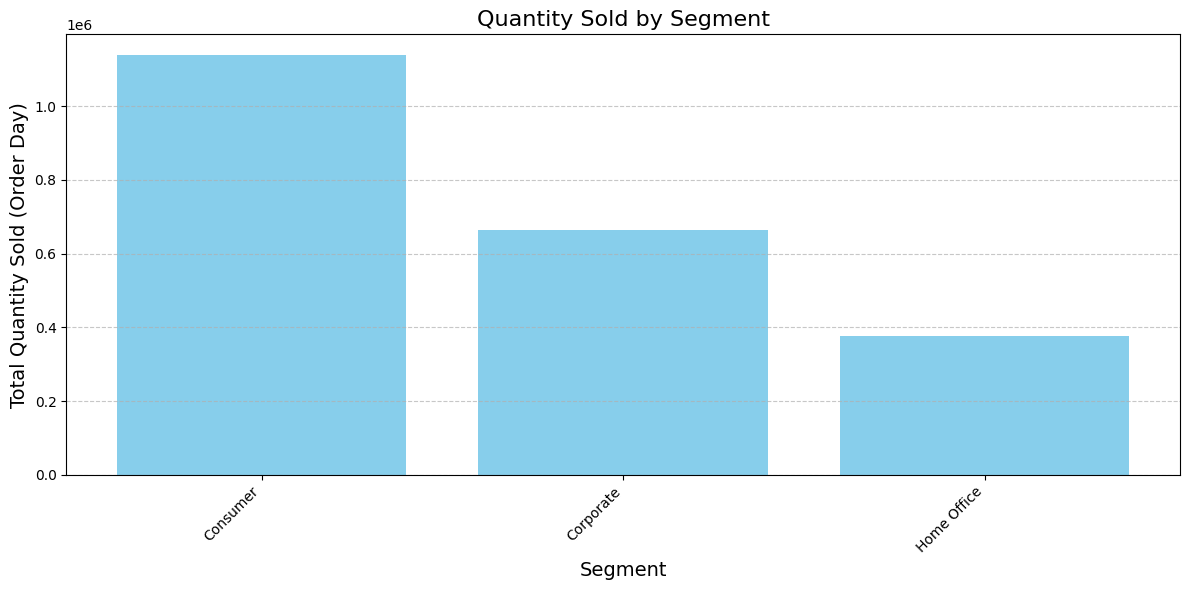

In [51]:


# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(quantity_by_segment['Segment'], quantity_by_segment['Order Day'], color='skyblue')

# Add titles and labels
plt.title('Quantity Sold by Segment', fontsize=16)
plt.xlabel('Segment', fontsize=14)
plt.ylabel('Total Quantity Sold (Order Day)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- The y-axis represents “Total Quantity Sold (Order Day),” and the x-axis represents different market segments.

The three segments are:

1.Consumer: Has the highest quantity sold.

2.Corporate: Comes next in terms of sales.

3.Home Office: Has the lowest quantity sold.

The y-axis scale ranges from 0 to 1 million, indicating large quantities.

<ipython-input-52-066d896ee0e9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ship Mode', y='Sales', data=avg_sales_by_ship_mode, palette='Set2')


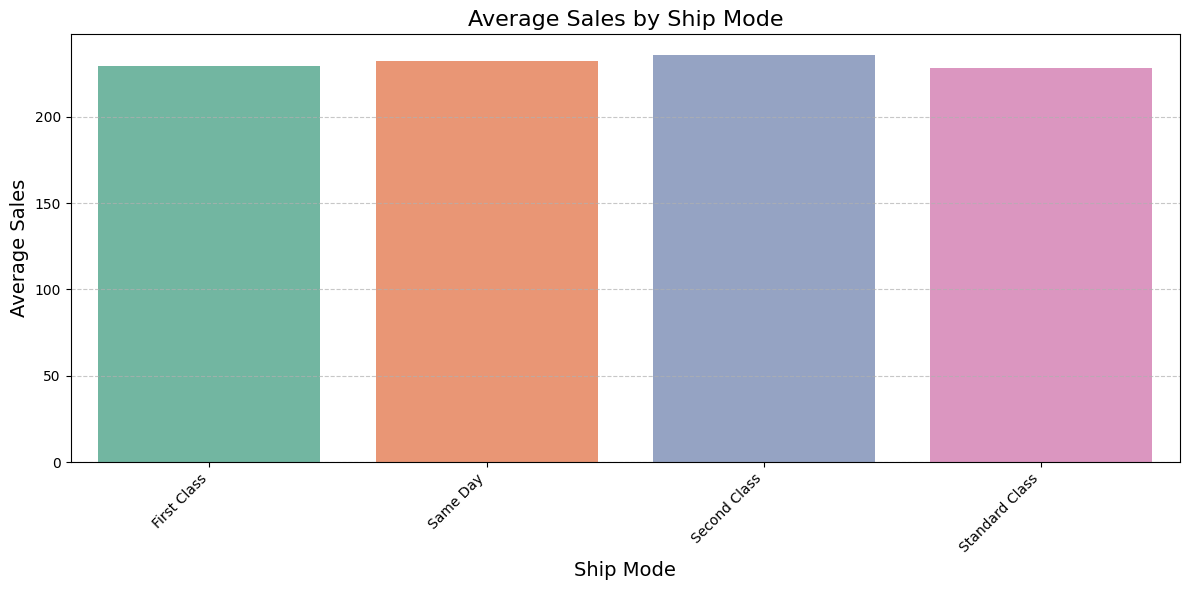

In [52]:
avg_sales_by_ship_mode = df1.groupby('Ship Mode')['Sales'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Ship Mode', y='Sales', data=avg_sales_by_ship_mode, palette='Set2')

# Add titles and labels
plt.title('Average Sales by Ship Mode', fontsize=16)
plt.xlabel('Ship Mode', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


** First Class:**
- This shipping mode has the highest average sales.

**Same Day:**

- The average sales for this mode are lower than First Class but higher than the other two.

**Second Class:**
- The average sales for Second Class fall in between Same Day and Standard Class.

**Standard Class:**
- This mode has the lowest average sales.

In [53]:
# Calculate total sales by product
sales_by_product = df1.groupby('Product Name')['Sales'].sum().reset_index()
sales_by_product = sales_by_product.sort_values(by='Sales', ascending=False)

In [54]:
# Calculate total sales by category
sales_by_category = df1.groupby('Category')['Sales'].sum().reset_index()
sales_by_category = sales_by_category.sort_values(by='Sales', ascending=False)

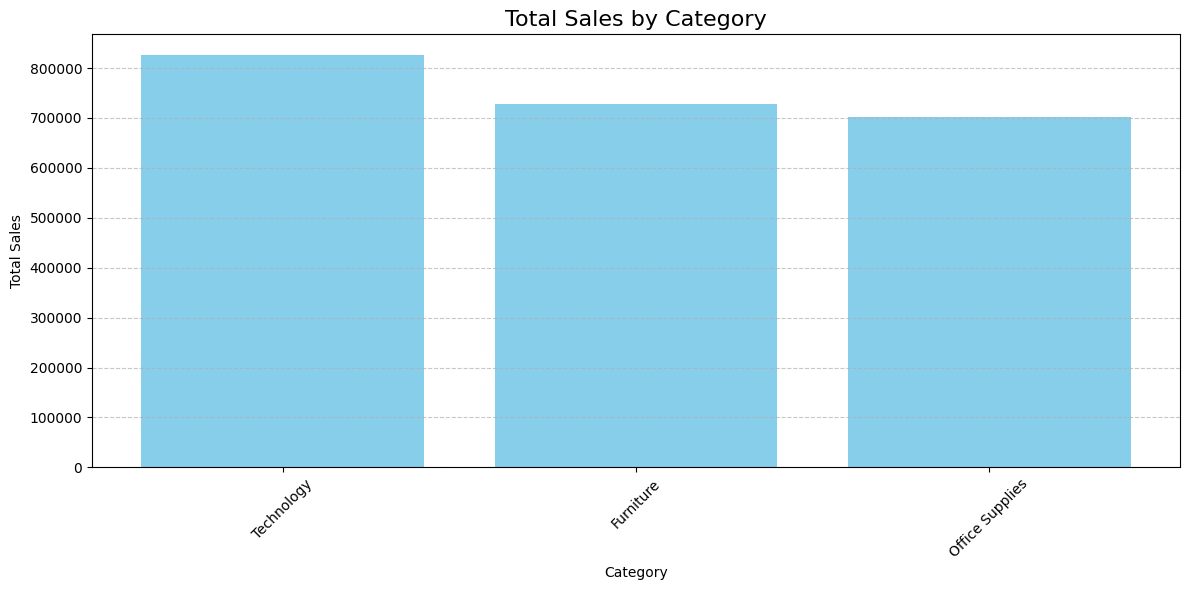

In [55]:
plt.figure(figsize=(12, 6))
plt.bar(sales_by_category['Category'], sales_by_category['Sales'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Category', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Technology:**
- This category has the highest total sales, represented by the tallest bar. The exact value isn’t visible, but it’s above $700,000.

**Furniture:**
- The second-highest total sales, with a value around $600,000.

**Office Supplies:**
- The lowest total sales, approximately $300,000.

In [56]:
df1.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Day,YearMonth,Month
Order Date,,,,,,,,,,,,,,,,,,,,
2017-11-08,1,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261,312,2017-11,2017-11
2017-11-08,2,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731,312,2017-11,2017-11
2017-06-12,3,CA-2017-138688,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14,163,2017-06,2017-06
2016-10-11,4,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957,285,2016-10,2016-10
2016-10-11,5,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22,285,2016-10,2016-10


In [59]:
# Calculate total sales by region and category
sales_by_region_category = df1.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

# Pivot the DataFrame for grouped bar chart
pivot_sales = sales_by_region_category.pivot(index='Region', columns='Category', values='Sales').fillna(0)

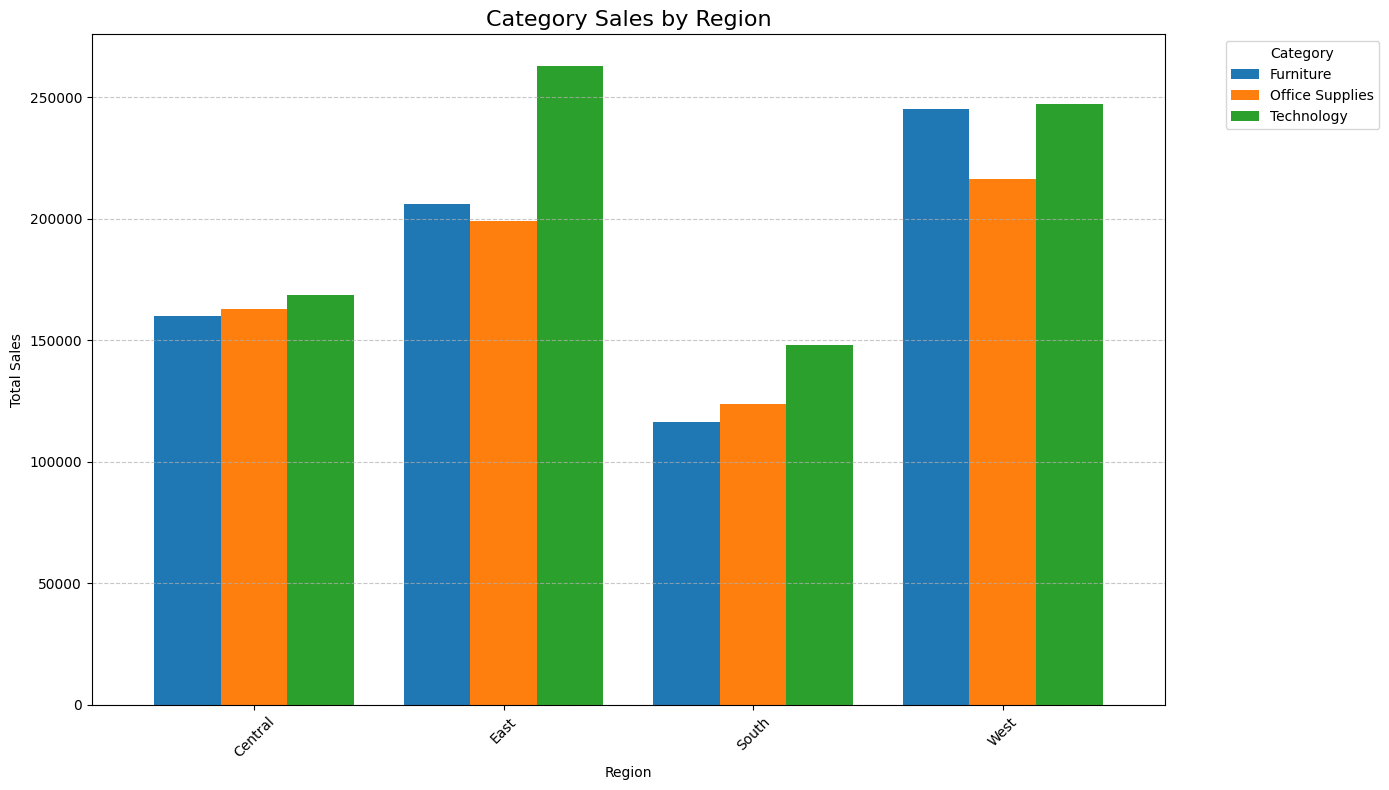

In [60]:
import matplotlib.pyplot as plt

# Plot grouped bar chart
pivot_sales.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Category Sales by Region', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




**Central Region:**

 The highest total sales are in the Furniture category, followed by Technology and Office Supplies.

**East Region:••

 Furniture sales dominate, with Technology and Office Supplies trailing behind.

**South Region:**

 Technology sales lead, followed by Furniture and Office Supplies.

**West Region:**

 Technology sales are significantly higher than the other two categories.

**Document Findings**



### Sales Data Overview:

- **Average Sales**: $230

- **Median Sales**: $54

- **Range**: $0 to $22,638

- **Standard Deviation**: 626

- **Sales Distribution**:
  - Majority of sales are lower, clustering towards the lower values.
  - Few high-value sales skew the average higher.
  - Data is right-skewed with a few outliers.

### Postal Code Distribution:
- **Histogram Analysis**:
  - Orders are dispersed across various postal codes.
  - Peaks indicate areas with high order concentrations.
  - Trends can reflect seasonal patterns or marketing impacts.
  - Outliers may indicate extraordinary events affecting order volumes.

### Yearly Sales Trend:
- **Growth**: Sales show an upward trend, increasing from around 500,000 in 2016 to approximately 700,000 by 2018.
- **Seasonality**: Peaks around mid-year (May and September) with slight dips in January.
- **Forecasting**: Anticipate continued growth based on historical trends.

### Sales Decomposition:
1. **Original Series**: Raw data fluctuations over time.
2. **Trend Component**: Long-term movement, indicating overall growth.
3. **Seasonal Component**: Regular fluctuations within a fixed period.
4. **Residual Component**: Noise or irregular variations.

### Box Plot Insights:
- **Interquartile Range (IQR)**: Central 50% of data.
- **Median**: Line inside the box, representing the midpoint.
- **Whiskers**: Extend from the box edges, showing data range.
- **Outliers**: Data points beyond whiskers, indicating significant deviations.

### Category Sales Comparison:
- **Furniture**: Highest total sales (~$800,000).

- **Technology**: Close second (~$700,000).

- **Office Supplies**: Lowest (~$400,000).

- **Pie Chart**: Technology leads with 36.6% of total sales, followed by Office Supplies (31.1%) and Furniture (32.2%).

### Heatmap Interpretation:
- **Correlation**:
  - Positive (red squares) indicates strong internal relationships.
  - Negative (blue squares) shows weak correlation between Sales and Postal Code.

### Regional Sales Analysis:
- **Furniture**: Highest in Central and East regions.
- **Technology**: Dominates in South and West regions.
- **Office Supplies**: Lowest overall.

### Customer Segments:
- **Consumer**: Highest quantity sold.
- **Corporate**: Next highest.
- **Home Office**: Lowest quantity sold.

### Quantity vs. Sales:
- **Quantity Sold**: Most data points cluster near lower quantities.
- **Sales**: Higher sales are linked to higher quantities, but not necessarily linear.

### Shipping Mode Analysis:
- **First Class**: Highest average sales.
- **Same Day**: Lower than First Class but higher than others.
- **Second Class**: Intermediate average sales.
- **Standard Class**: Lowest average sales.

This summary captures the main insights and trends from the sales data, including distribution patterns, category comparisons, regional performance, and shipping mode analysis.